In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

Here we have 32560 rows and 15 columns

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [7]:
df.dtypes 

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Here we have 6 columns with int datatype, 9 columns with object datatype into this dataset

In [8]:
# checking the null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here we dont have null values

<AxesSubplot:>

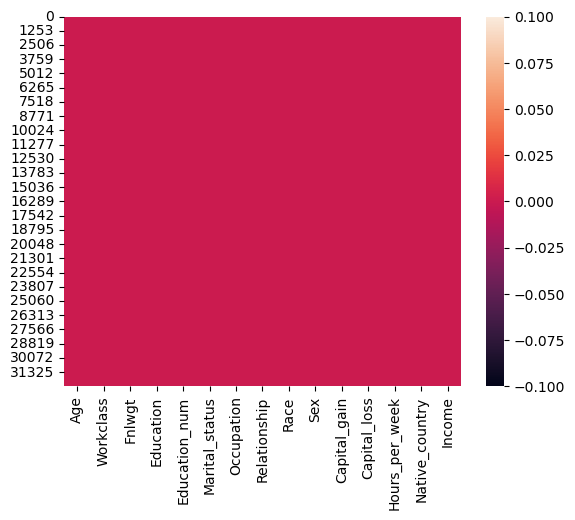

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.duplicated().sum()

24

Here we have 24 duplicate records

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

Here we have treated the duplicated records

In [14]:
# check the unique values count of each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype

Here we have to predict the income thats why it is an classification problem and we have to build model on classification problem

In [15]:
# separating Numerical and categorical columns

#checking for categorical columns

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print('Categorical columns    :',categorical_col)
print("\n")

#checking for Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print('Numerical columns    :',numerical_col)     

Categorical columns    : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical columns    : ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [16]:
# checking the unique values of each columns using dataframe

df.nunique().to_frame("Number of Unique Values")

,Number of Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [17]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Here the count of all columns is same means there is no null values into the dataset

the mean value is greater than median in all the columns means data skewed to right

max is higher in capital_gain,capital_loss and Hour_per_week means outliers present

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


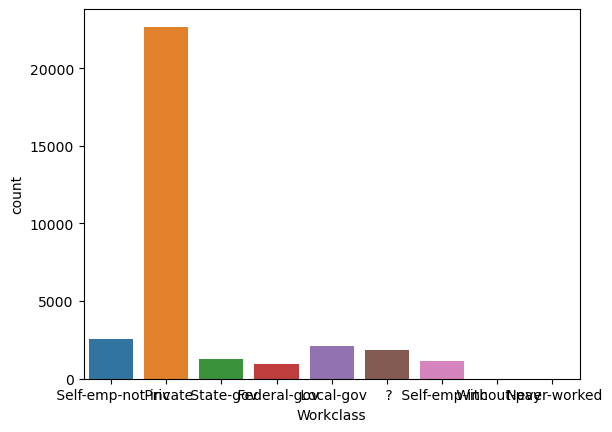

In [18]:
#univariate used to analyze the single column

ax=sns.countplot(x='Workclass',data=df)
print(df['Workclass'].value_counts())

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


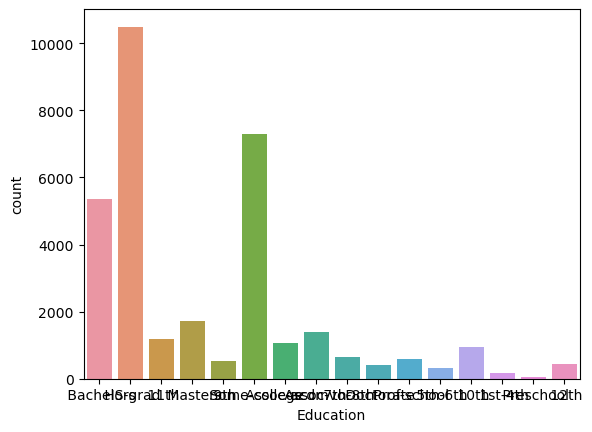

In [19]:
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


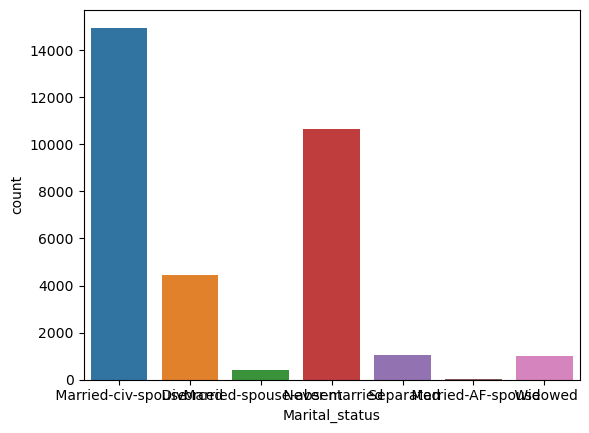

In [20]:
ax=sns.countplot(x='Marital_status',data=df)
print(df['Marital_status'].value_counts())

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


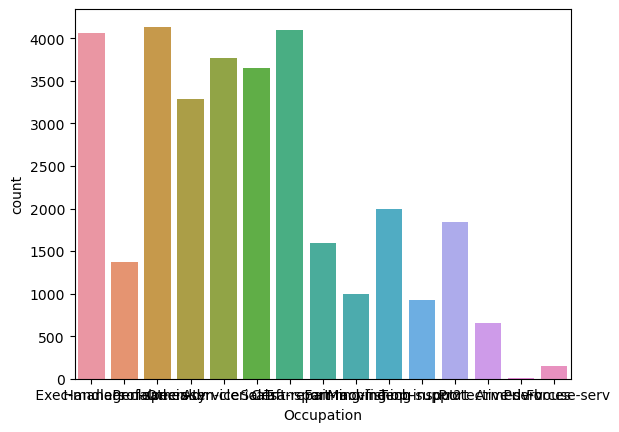

In [21]:
ax=sns.countplot(x='Occupation',data=df)
print(df['Occupation'].value_counts())

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


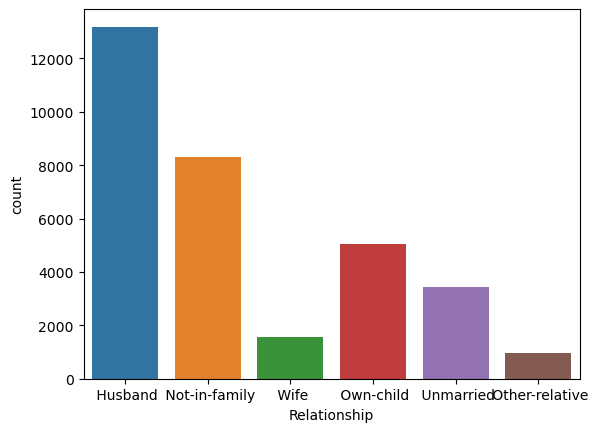

In [22]:
ax=sns.countplot(x='Relationship',data=df)
print(df['Relationship'].value_counts())

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


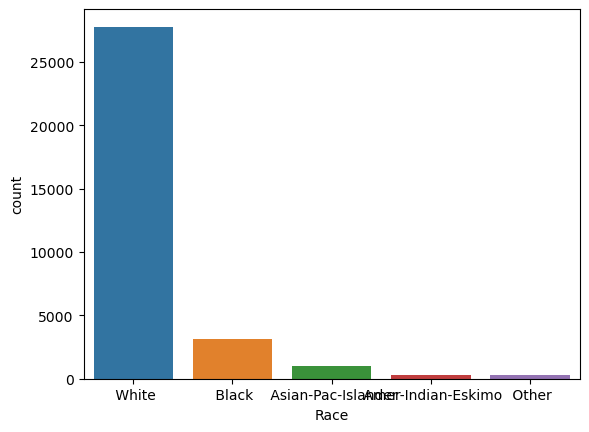

In [23]:
ax=sns.countplot(x='Race',data=df)
print(df['Race'].value_counts())

 Male      21774
 Female    10762
Name: Sex, dtype: int64


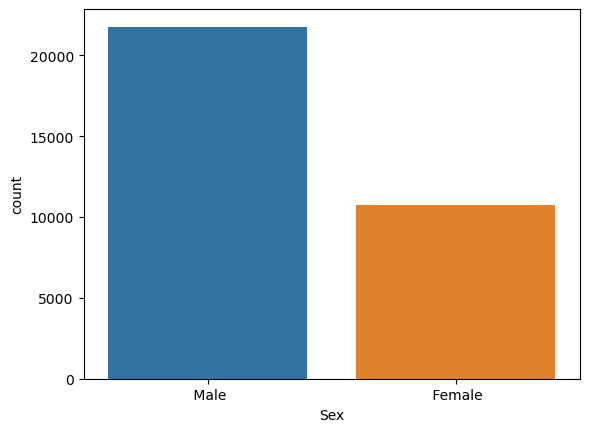

In [24]:
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


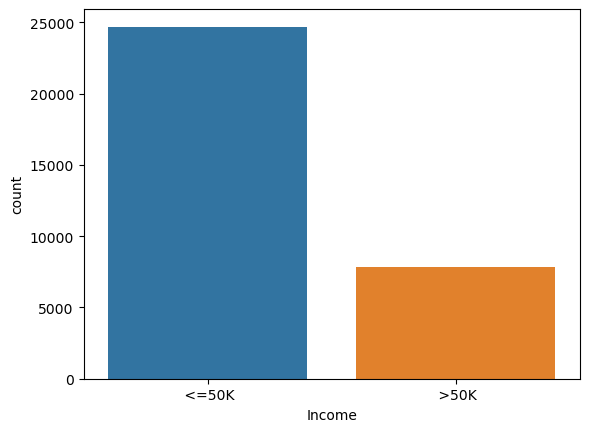

In [25]:
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

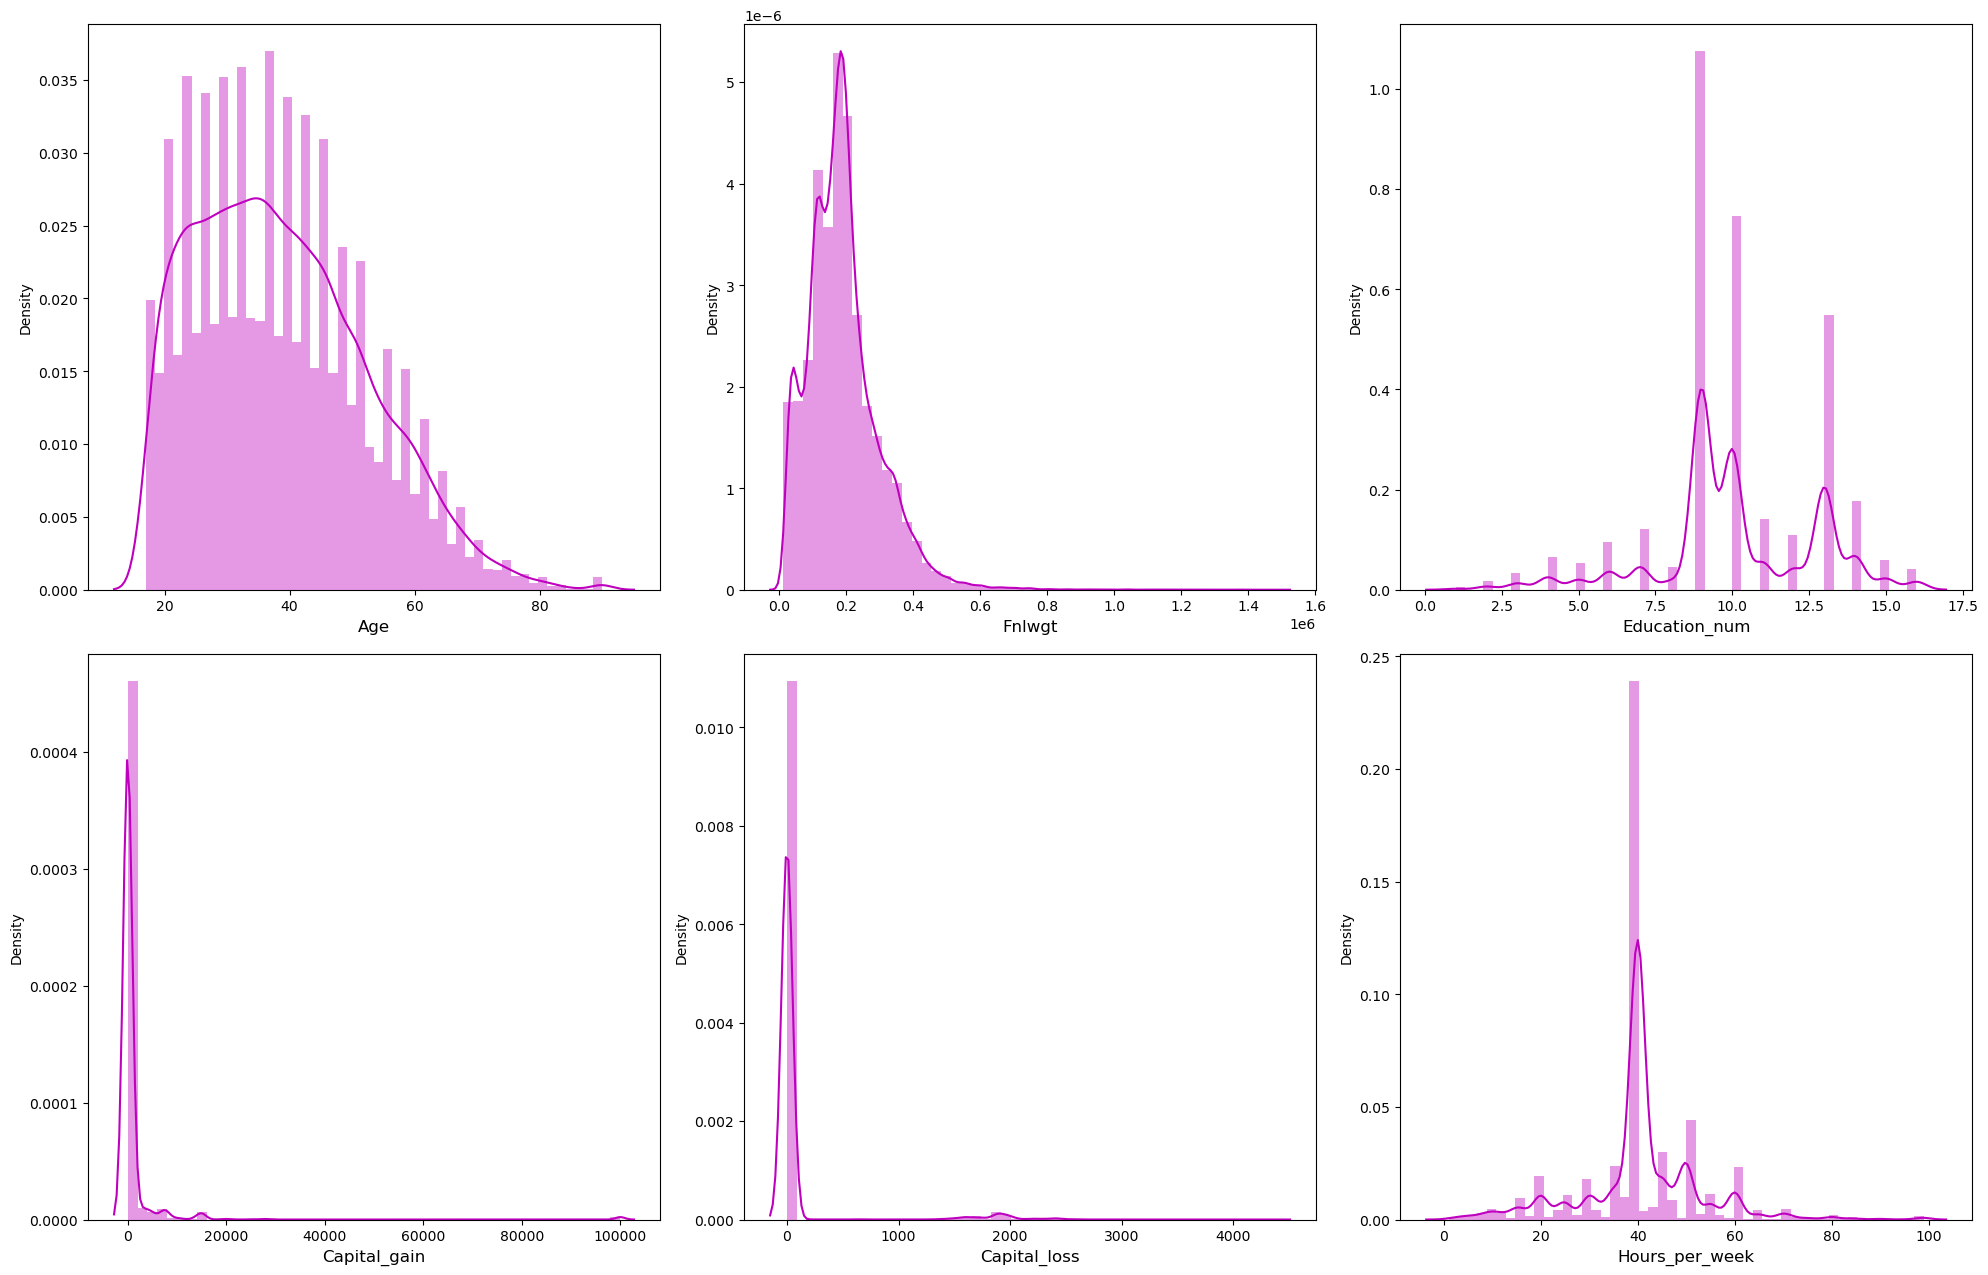

In [27]:
# lets check how data distributed to the remaining columns

plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()  

Here skewness found in all columns

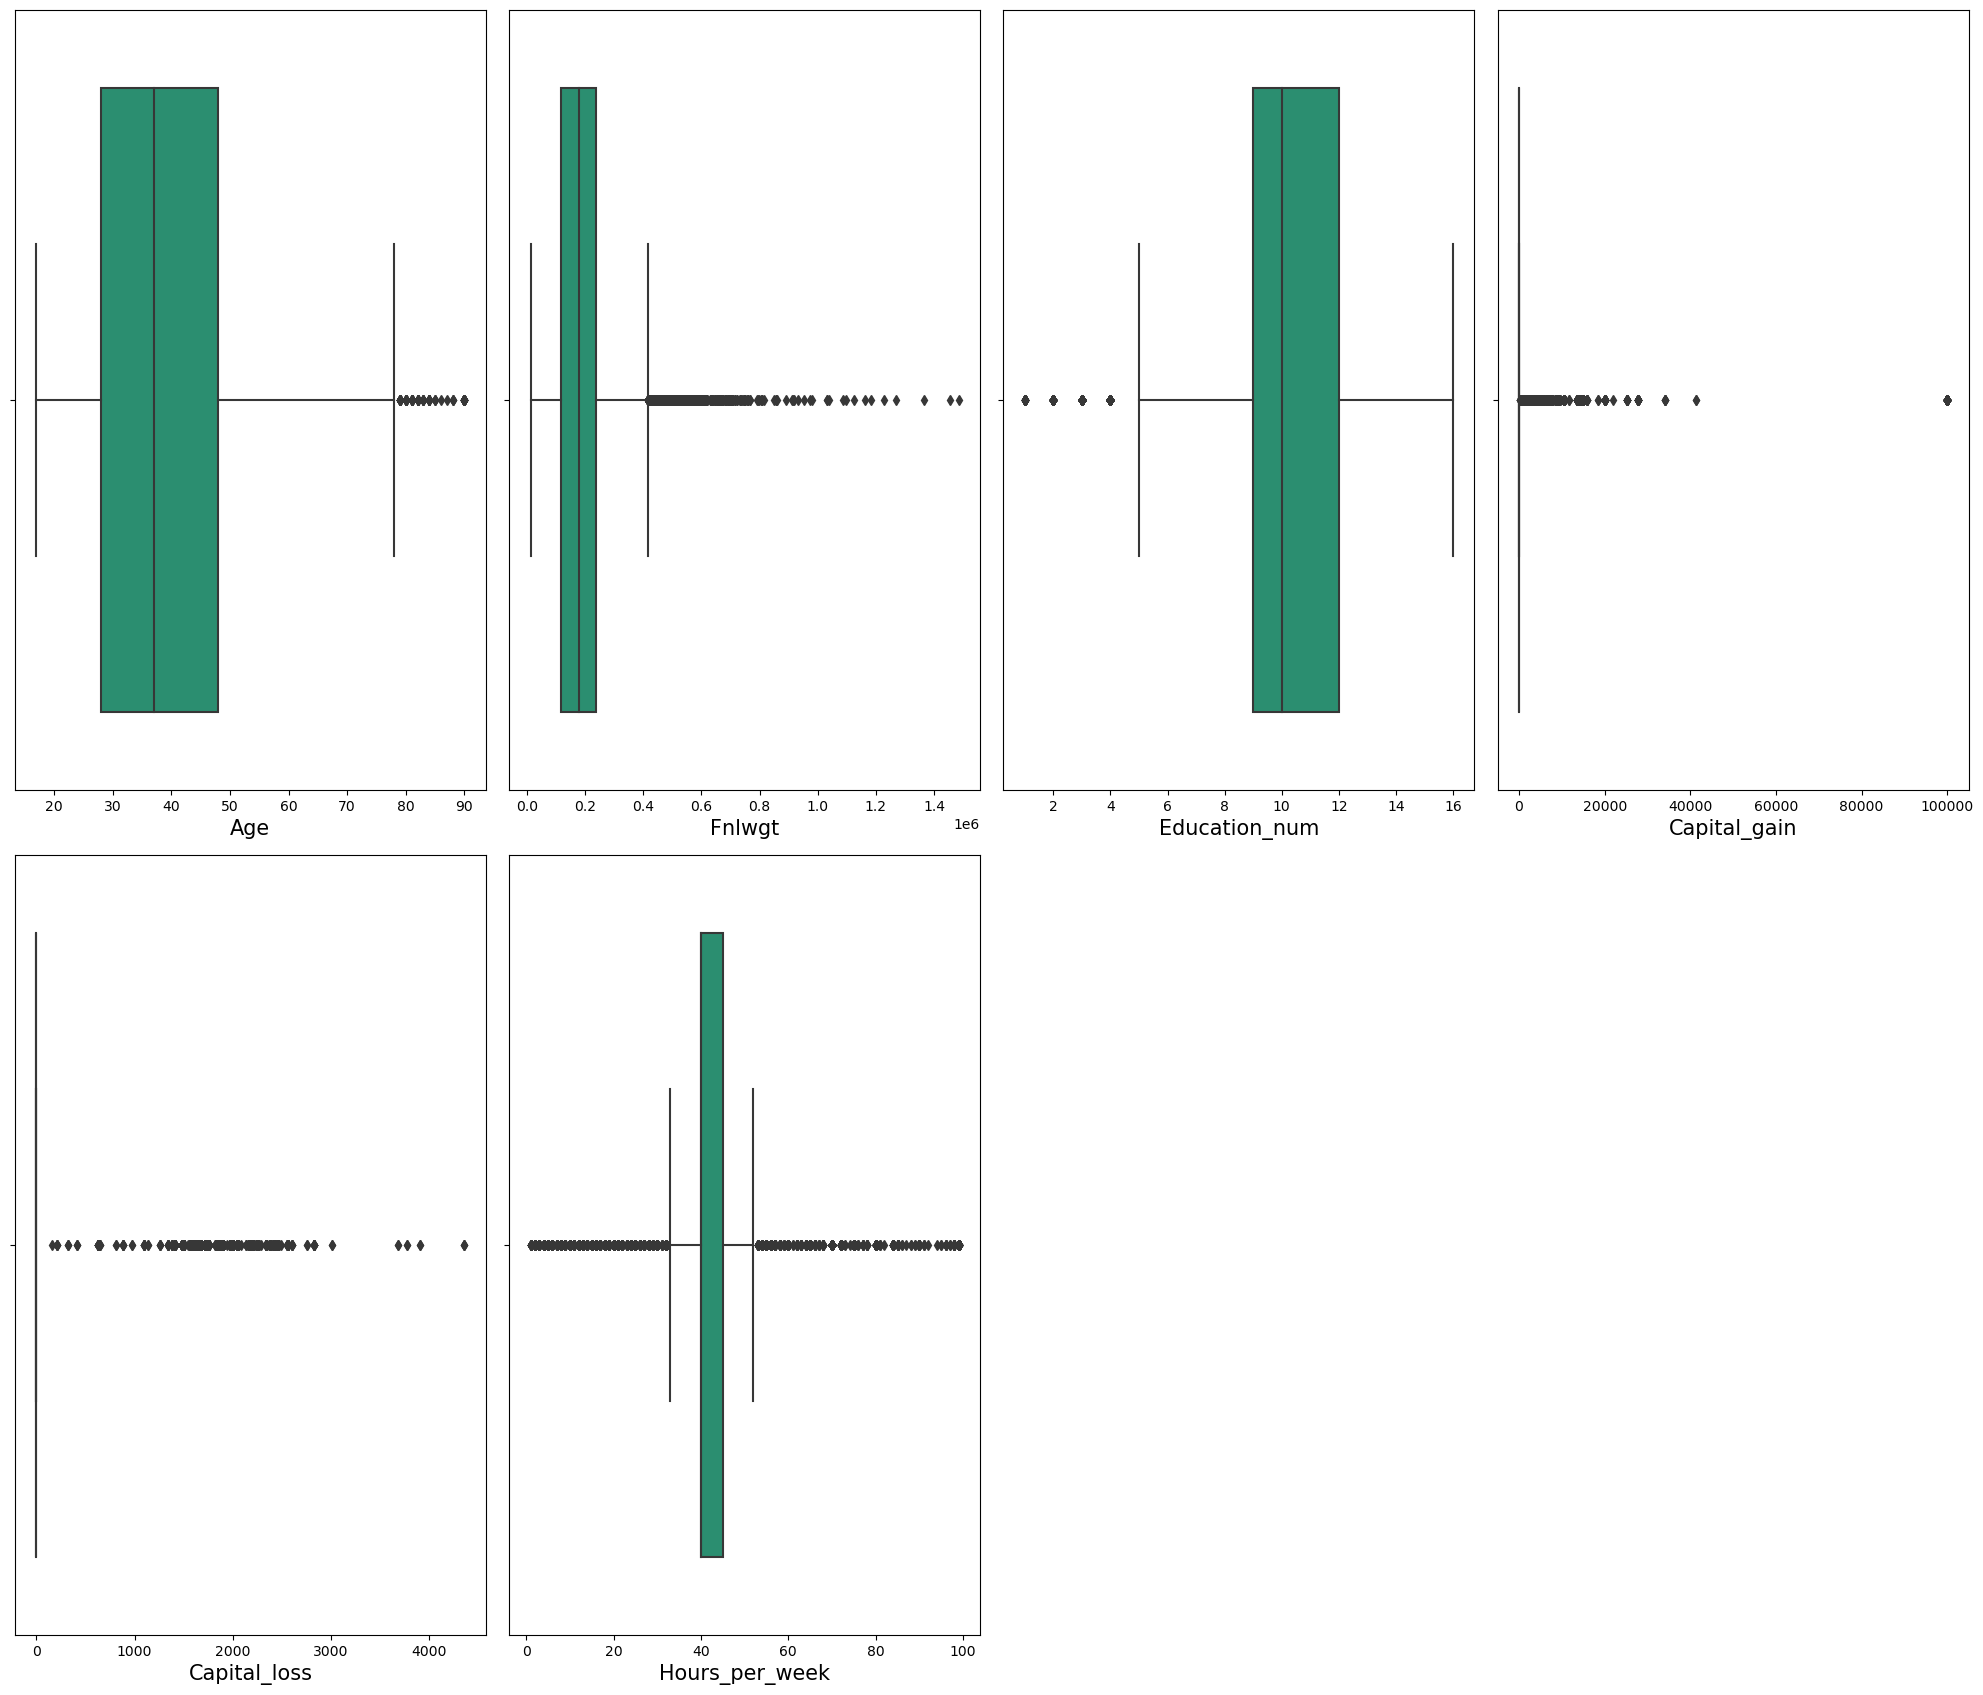

In [28]:
# lets check the oytliers by suing box plot

plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col],palette="Dark2")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout() 

Outliers found in all columns

In [29]:
from scipy.stats import zscore
out_features=df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]
z=np.abs(zscore(out_features))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,1.134817,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.420646,0.145969,0.216747,0.035664
2,1.056935,0.425720,1.198377,0.145969,0.216747,0.035664
3,0.776180,1.408036,1.134817,0.145969,0.216747,0.035664
4,0.116259,0.898091,1.523683,0.145969,0.216747,0.035664
...,...,...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.420646,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.420646,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.420646,0.145969,0.216747,1.655506


In [31]:
# threshold = 3
np.where(z>3)

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [33]:
# now removing the data which is above zscore and creating new df

df1=df[(z<3).all(axis=1)]
df1.shape

(29808, 15)

In [34]:
print('Old Dataframe',df.shape)
print('New Dataframe',df1.shape)

Old Dataframe (32536, 15)
New Dataframe (29808, 15)


In [35]:
print('Data Loss percentage', ((df.shape[0]-df1.shape[0]))/df.shape[0]*100)

Data Loss percentage 8.384558642734202


Here we have treated the outliers 

In [39]:
df=df1

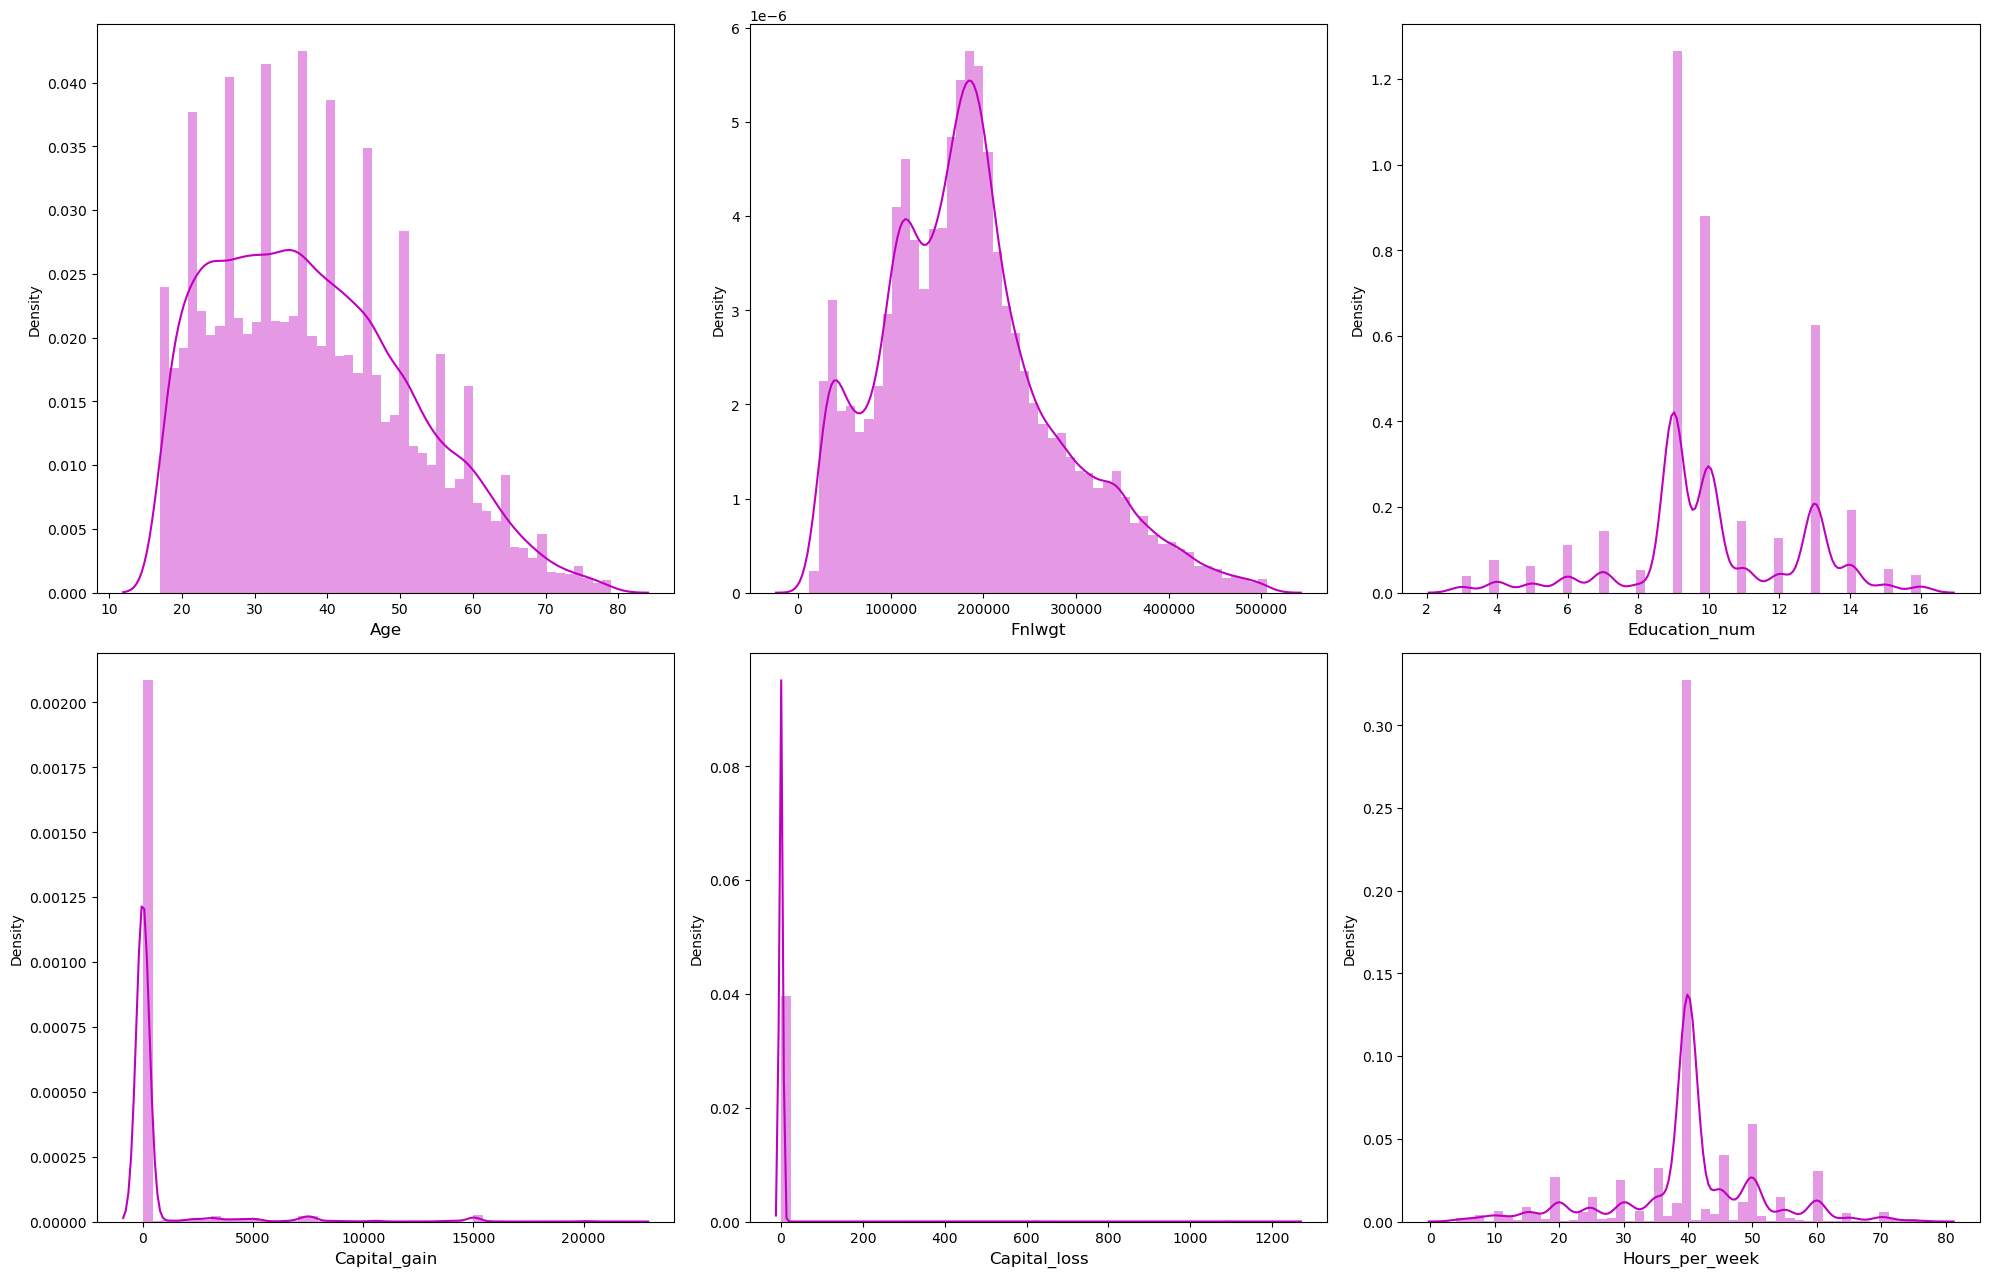

In [40]:
# lets check how data distributed to the remaining columns

plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()

In [37]:
df.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

In [41]:
# removing skewness using cube root

df['Fnlwgt']=np.cbrt(df['Fnlwgt'])
df['Captital_gain']=np.cbrt(df['Capital_gain'])
df['Capital_loss']=np.cbrt(df['Capital_loss'])

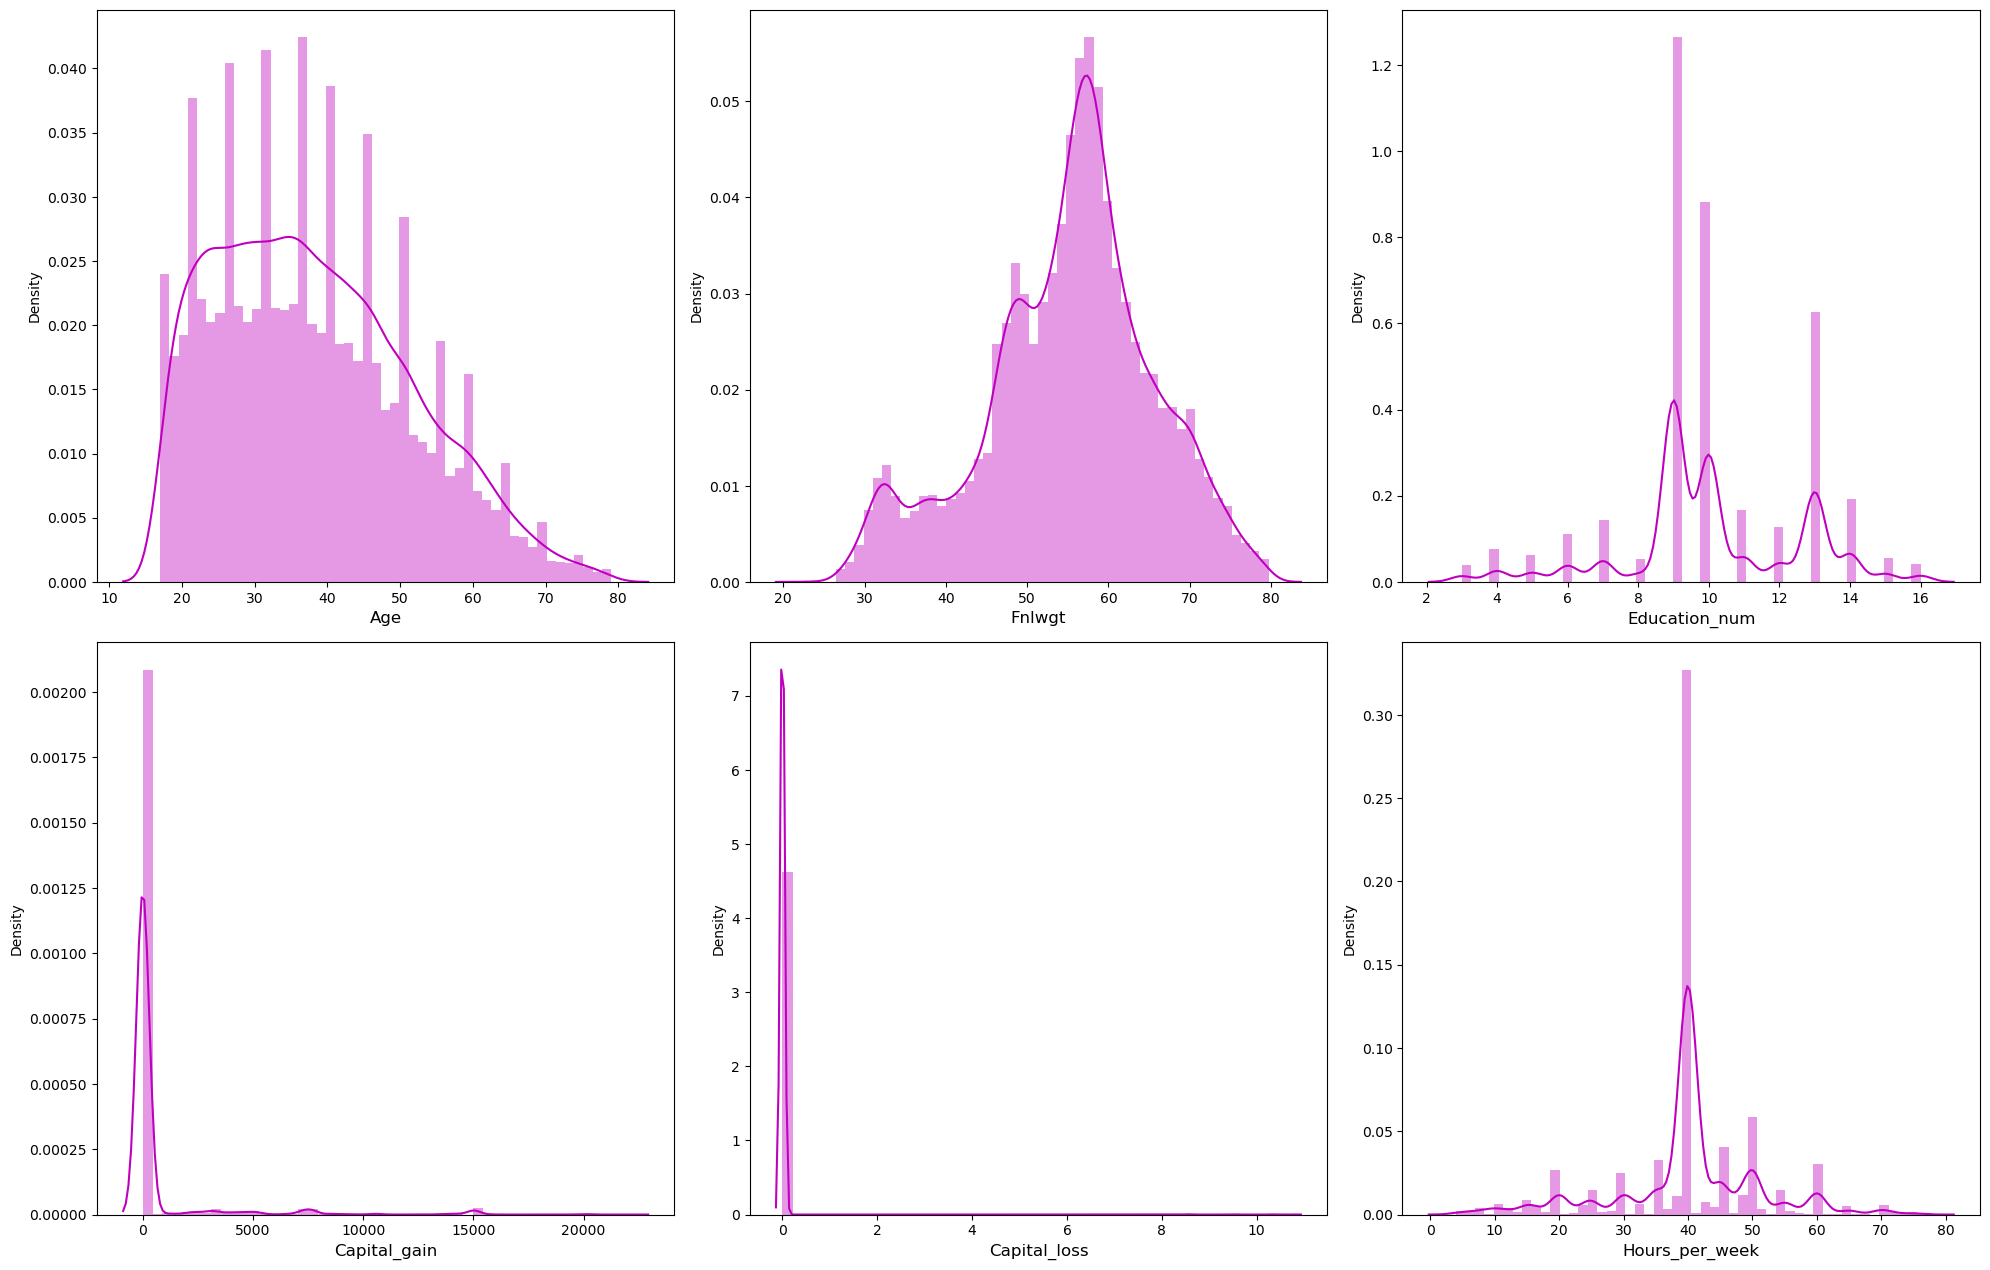

In [42]:
# lets check how data distributed to the remaining columns

plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()

Now the data distribution looks good

In [43]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df  

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Captital_gain
0,50,6.0,43.675121,8.0,13,2.0,4.0,0.0,4.0,1.0,0,0.0,13,38.0,0.0,0.000000
1,38,4.0,59.967204,10.0,9,0.0,6.0,1.0,4.0,1.0,0,0.0,40,38.0,0.0,0.000000
2,53,4.0,61.685627,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0.0,40,38.0,0.0,0.000000
3,28,4.0,69.686283,8.0,13,2.0,10.0,5.0,2.0,0.0,0,0.0,40,5.0,0.0,0.000000
4,37,4.0,65.776255,11.0,14,2.0,4.0,5.0,4.0,0.0,0,0.0,40,38.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,63.603506,6.0,12,2.0,13.0,5.0,4.0,0.0,0,0.0,38,38.0,0.0,0.000000
32556,40,4.0,53.644440,10.0,9,2.0,7.0,0.0,4.0,1.0,0,0.0,40,38.0,1.0,0.000000
32557,58,4.0,53.357498,10.0,9,6.0,1.0,4.0,4.0,0.0,0,0.0,40,38.0,0.0,0.000000
32558,22,4.0,58.625222,10.0,9,4.0,1.0,3.0,4.0,1.0,0,0.0,20,38.0,0.0,0.000000


In [47]:
df.drop('Captital_gain',inplace=True,axis=1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29808 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             29808 non-null  int64  
 1   Workclass       29808 non-null  float64
 2   Fnlwgt          29808 non-null  float64
 3   Education       29808 non-null  float64
 4   Education_num   29808 non-null  int64  
 5   Marital_status  29808 non-null  float64
 6   Occupation      29808 non-null  float64
 7   Relationship    29808 non-null  float64
 8   Race            29808 non-null  float64
 9   Sex             29808 non-null  float64
 10  Capital_gain    29808 non-null  int64  
 11  Capital_loss    29808 non-null  float64
 12  Hours_per_week  29808 non-null  int64  
 13  Native_country  29808 non-null  float64
 14  Income          29808 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 3.6 MB


In [49]:
#checking corrleations with the target variable
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.008498,-0.063505,-0.004661,0.041431,-0.285335,-0.015931,-0.266802,0.027937,0.086589,0.131014,0.020495,0.091817,0.000011,0.239314
Workclass,0.008498,1.000000,-0.014453,0.022056,0.048848,-0.059397,0.251327,-0.089733,0.045840,0.092863,0.025769,-0.006347,0.126949,-0.006101,0.042179
Fnlwgt,-0.063505,-0.014453,1.000000,-0.022912,-0.034395,0.026919,-0.000314,0.010751,-0.006228,0.022693,0.000582,0.000502,-0.016579,-0.056214,-0.003924
Education,-0.004661,0.022056,-0.022912,1.000000,0.361097,-0.037416,-0.022595,-0.012924,0.015588,-0.027878,0.027164,-0.000950,0.060787,0.060242,0.074621
Education_num,0.041431,0.048848,-0.034395,0.361097,1.000000,-0.059092,0.108343,-0.096694,0.028587,0.009276,0.154841,0.009050,0.150713,0.026192,0.318731
Marital_status,-0.285335,-0.059397,0.026919,-0.037416,-0.059092,1.000000,-0.007189,0.184713,-0.066169,-0.123350,-0.068272,-0.015995,-0.195162,-0.021221,-0.194355
Occupation,-0.015931,0.251327,-0.000314,-0.022595,0.108343,-0.007189,1.000000,-0.074075,0.006637,0.081435,0.023325,0.000321,0.069887,-0.012224,0.069770
Relationship,-0.266802,-0.089733,0.010751,-0.012924,-0.096694,0.184713,-0.074075,1.000000,-0.116226,-0.577197,-0.090370,0.034251,-0.257798,-0.004903,-0.245913
Race,0.027937,0.045840,-0.006228,0.015588,0.028587,-0.066169,0.006637,-0.116226,1.000000,0.089914,0.023537,0.000126,0.045400,0.136140,0.071755
Sex,0.086589,0.092863,0.022693,-0.027878,0.009276,-0.123350,0.081435,-0.577197,0.089914,1.000000,0.070813,-0.031002,0.233755,-0.008376,0.209946


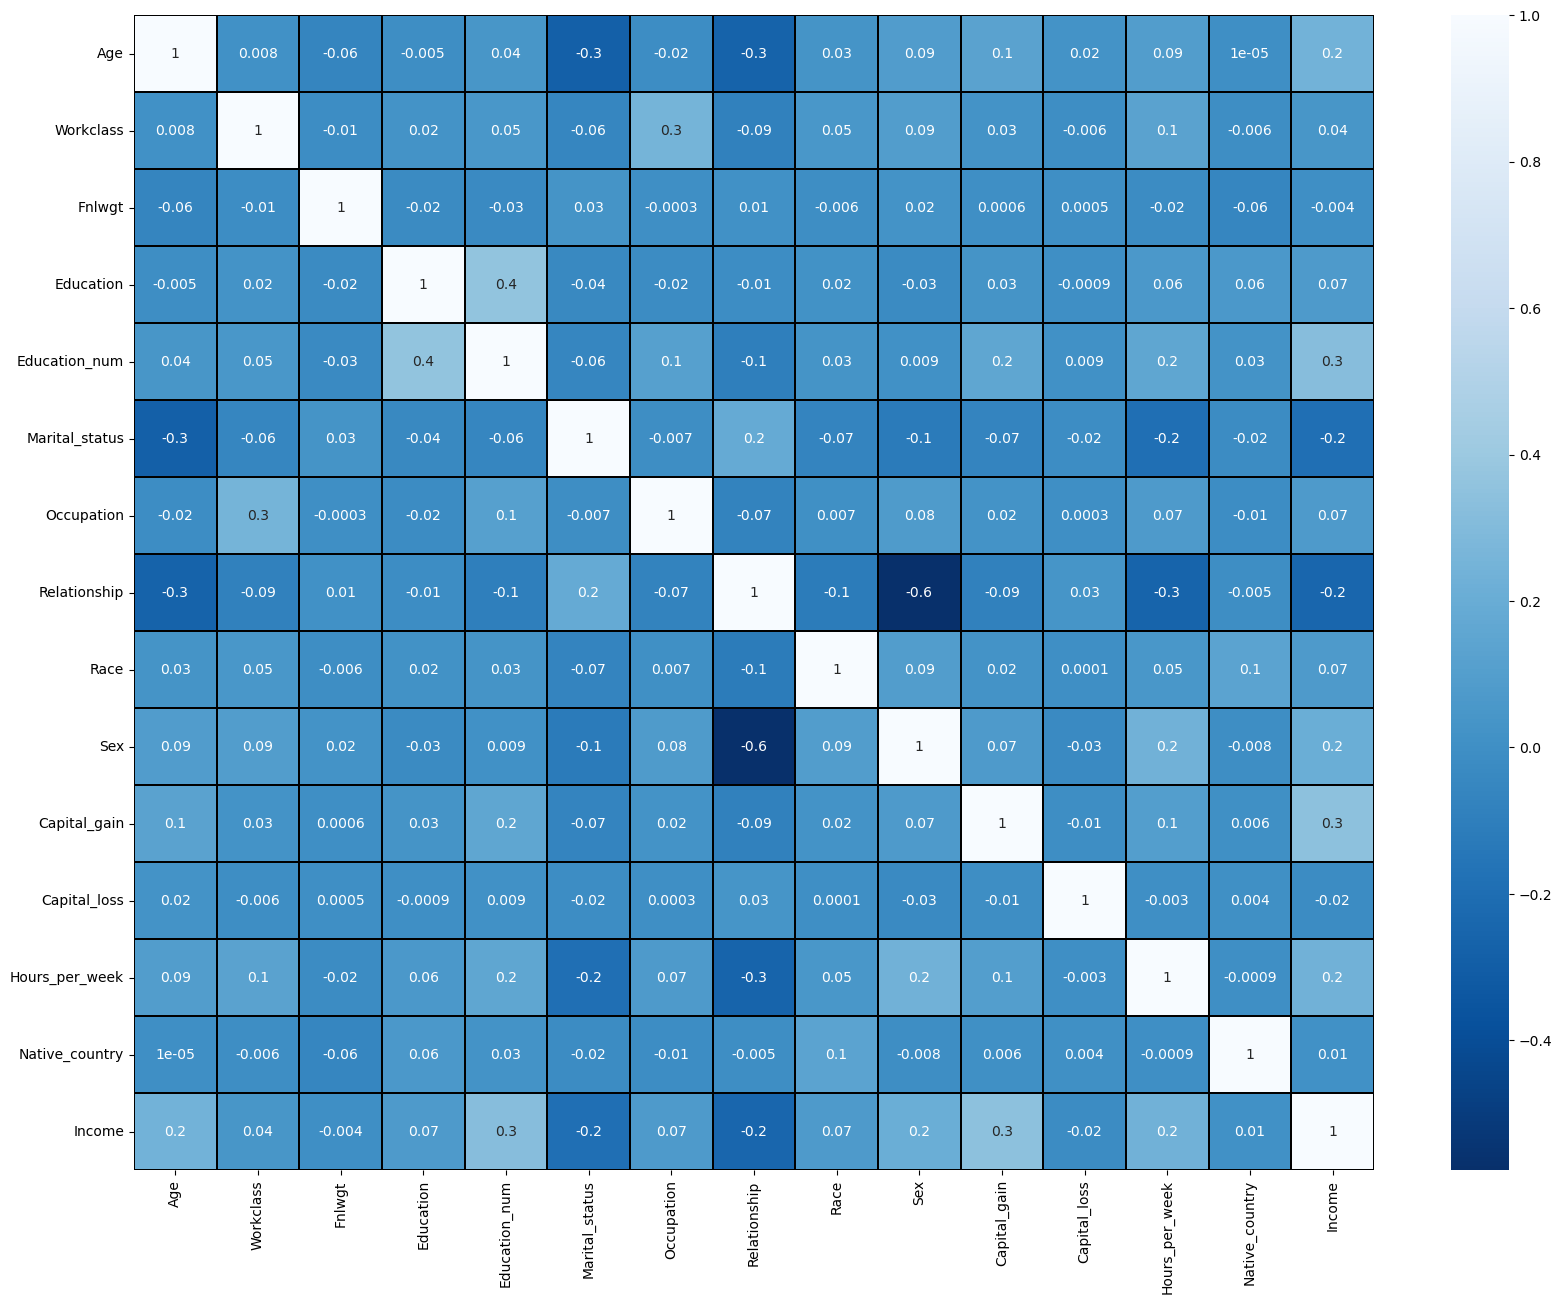

In [50]:
# visualize the correlation matrix using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1, fmt=".1g", linecolor="black", annot=True, cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

In [64]:
cor["Income"].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.342581
Education_num     0.318731
Age               0.239314
Hours_per_week    0.230589
Sex               0.209946
Education         0.074621
Race              0.071755
Occupation        0.069770
Workclass         0.042179
Native_country    0.012894
Fnlwgt           -0.003924
Capital_loss     -0.017357
Marital_status   -0.194355
Relationship     -0.245913
Name: Income, dtype: float64

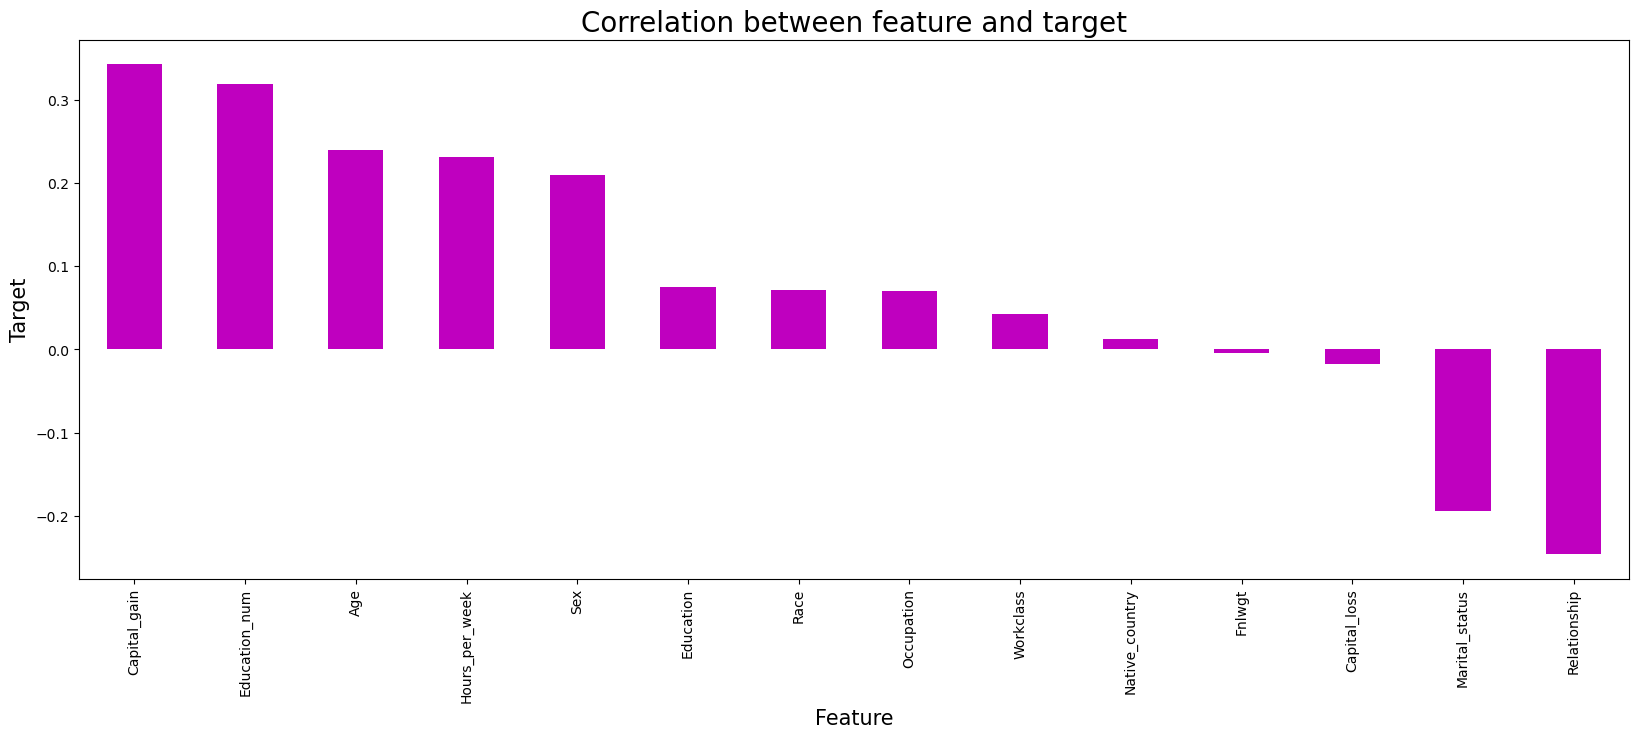

In [65]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

Here we can say that all the columns have very very less correlation with the target varibale

In [71]:
# separating the indepent and target variables into x and y

x=df.drop('Income', axis=1)
y=df['Income']

In [72]:
x.shape

(29808, 14)

In [73]:
y.shape

(29808,)

In [74]:
# feature sclaing using standrd scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887304,1.474823,-1.101836,-0.340122,1.191227,-0.410260,-0.603110,-0.919032,0.393999,0.716254,-0.244524,-0.039624,-2.415235,0.286656
1,-0.011046,0.093645,0.463152,0.249488,-0.439623,-1.730676,-0.130913,-0.297940,0.393999,0.716254,-0.244524,-0.039624,0.009070,0.286656
2,1.111891,0.093645,0.628220,-2.403756,-1.255048,-0.410260,-0.130913,-0.919032,-1.956981,0.716254,-0.244524,-0.039624,0.009070,0.286656
3,-0.759670,0.093645,1.396749,-0.340122,1.191227,-0.410260,0.813482,2.186429,-1.956981,-1.396153,-0.244524,-0.039624,0.009070,-4.108664
4,-0.085908,0.093645,1.021159,0.544293,1.598939,-0.410260,-0.603110,2.186429,0.393999,-1.396153,-0.244524,-0.039624,0.009070,0.286656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29803,-0.834532,0.093645,0.812448,-0.929731,0.783514,-0.410260,1.521779,2.186429,0.393999,-1.396153,-0.244524,-0.039624,-0.170508,0.286656
29804,0.138679,0.093645,-0.144201,0.249488,-0.439623,-0.410260,0.105186,-0.919032,0.393999,0.716254,-0.244524,-0.039624,0.009070,0.286656
29805,1.486203,0.093645,-0.171764,0.249488,-0.439623,2.230572,-1.311406,1.565337,0.393999,-1.396153,-0.244524,-0.039624,0.009070,0.286656
29806,-1.208844,0.093645,0.334244,0.249488,-0.439623,0.910156,-1.311406,0.944244,0.393999,0.716254,-0.244524,-0.039624,-1.786711,0.286656


In [75]:
# finding variance inflation factor in each scaled column i.e., x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns

vif

,VIF Values,Features
0,1.178266,Age
1,1.088174,Workclass
2,1.009714,Fnlwgt
3,1.162459,Education
4,1.223187,Education_num
5,1.137133,Marital_status
6,1.089120,Occupation
7,1.674265,Relationship
8,1.037498,Race
9,1.548552,Sex


Here we didnt found any Multicolinearity issue 

In [76]:
y.value_counts()

0.0    23156
1.0     6652
Name: Income, dtype: int64

In [77]:
#oversampling the data

!pip install imblearn
from imblearn.over_sampling import SMOTE
sm= SMOTE()
x1,y1=sm.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [78]:
y1.value_counts()

0.0    23156
1.0    23156
Name: Income, dtype: int64

In [79]:
#finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxACCU=0
maxRS=0

for i in range(1,50):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=1
print("best accuracy is:", maxACCU,  "at random state:",maxRS)        
        

best accuracy is: 0.9044911472578091 at random state: 1


In [80]:
# creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)


Classification Algorithms

In [81]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [82]:
#checking accuracy score for randomforestclassifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8572067538857207
[[6511  450]
 [ 827 1155]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      6961
         1.0       0.72      0.58      0.64      1982

    accuracy                           0.86      8943
   macro avg       0.80      0.76      0.78      8943
weighted avg       0.85      0.86      0.85      8943



In [83]:
#checking accuracy score for Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.830370121883037
[[6633  328]
 [1189  793]]
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      6961
         1.0       0.71      0.40      0.51      1982

    accuracy                           0.83      8943
   macro avg       0.78      0.68      0.70      8943
weighted avg       0.82      0.83      0.81      8943



In [84]:
#checking accuracy score for support vector machine

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8538521748853852
[[6660  301]
 [1006  976]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      6961
         1.0       0.76      0.49      0.60      1982

    accuracy                           0.85      8943
   macro avg       0.82      0.72      0.75      8943
weighted avg       0.85      0.85      0.84      8943



In [85]:
#checking accuracy score for GradientBoostingClassifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8668232136866824
[[6639  322]
 [ 869 1113]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      6961
         1.0       0.78      0.56      0.65      1982

    accuracy                           0.87      8943
   macro avg       0.83      0.76      0.78      8943
weighted avg       0.86      0.87      0.86      8943



In [86]:
#checking accuracy score for AdaBoostClassifier

AB=AdaBoostClassifier()
AB.fit(x_train,y_train)
predAB=AB.predict(x_test)
print(accuracy_score(y_test,predAB))
print(confusion_matrix(y_test,predAB))
print(classification_report(y_test,predAB))

0.8638040925863804
[[6620  341]
 [ 877 1105]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      6961
         1.0       0.76      0.56      0.64      1982

    accuracy                           0.86      8943
   macro avg       0.82      0.75      0.78      8943
weighted avg       0.86      0.86      0.86      8943



In [87]:
#checking accuracy score for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8482612098848261
[[6435  526]
 [ 831 1151]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      6961
         1.0       0.69      0.58      0.63      1982

    accuracy                           0.85      8943
   macro avg       0.79      0.75      0.77      8943
weighted avg       0.84      0.85      0.84      8943



Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
# checking cv score for RandomForestClassifier

score1 = cross_val_score(RFC,x1,y1)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predRFC) - score1.mean())*100)

[0.83191191 0.88815718 0.92982077 0.93349169 0.92960484]
0.9025972777134077
Difference between accuracy score and cross val score is - -4.539052382768705


In [90]:
# checking cv score for Logistic Regression

score2 = cross_val_score(LR,x1,y1)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predLR) - score2.mean())*100)

[0.76109252 0.76368347 0.77391492 0.76938026 0.77035198]
0.7676846301880695
Difference between accuracy score and cross val score is - 6.268549169496751


In [91]:
# checking cv score for GradientBoostingClassifier

score3 = cross_val_score(GB,x1,y1)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predGB) - score3.mean())*100)

[0.81442297 0.85652596 0.87918376 0.88274671 0.87896783]
0.8623694461469092
Difference between accuracy score and cross val score is - 0.44537675397731125


In [93]:
# checking cv score for AdaBoost classifier

score4 = cross_val_score(AB,x1,y1)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predAB) - score4.mean())*100)

[0.80654216 0.83979272 0.86266465 0.86331246 0.86493198]
0.847448794323457
Difference between accuracy score and cross val score is - 1.6355298262923368


In [94]:
# checking cv score for Extratreesclassifier

score5 = cross_val_score(ET,x1,y1)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predET) - score5.mean())*100)

[0.86775343 0.89916874 0.93003671 0.93813431 0.93122436]
0.9132635084827587
Difference between accuracy score and cross val score is - -6.500229859793261


Here our best fit model is gradient boosting as cv score and accuracy score difference is least

Hyperparameter Tuning

In [97]:
# GradientBoostingclassifier

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [98]:
GCV=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

In [99]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [25, 50, 75]})

In [100]:
GCV.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 75}

In [102]:
final_model=GradientBoostingClassifier(n_estimators=75 ,learning_rate=0.2 ,max_depth=4 ,min_samples_split=4 ,min_samples_leaf=1 )
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.35323716873532


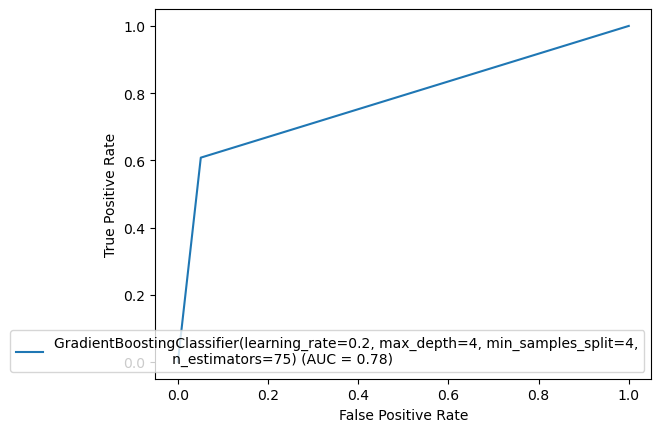

In [103]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

Saving the model

In [104]:
# saving model using .pkl

import joblib
joblib.dump(final_model,'Census Income.pkl')

['Census Income.pkl']

In [105]:
#lets load the saved model and get the predictions

model=joblib.load('Census Income.pkl')

#prediction
prediction=model.predict(x_test)
prediction

array([0., 0., 0., ..., 0., 1., 0.])

In [106]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
8938,1.0,0.0
8939,0.0,0.0
8940,0.0,0.0
8941,1.0,1.0
